In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Local import
from dataprocess import DataLoader, Blurr, Add_noise
from estimator import Estimator

In [2]:
import os
from PIL import Image
from scipy import signal

## Pre-process images

### Load image

In [3]:
file_name = 'Images'
im_name   = 'image01.png'
x_i = DataLoader(file_name,im_name)
x_i.shape

(600, 800)

### Define gaussian kernel

2D Gaussian-like array:


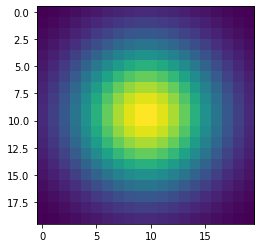

In [4]:
M=10
Nx, Ny = np.meshgrid(np.linspace(-1,1,2*M), np.linspace(-1,1,2*M))
d = np.sqrt(Nx*Nx+Ny*Ny)
sigma, mu = 0.5, 0.0
K = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )
K = K/K.sum()
print("2D Gaussian-like array:")
plt.imshow(K)

In [5]:
K.shape

(20, 20)

### Blurr and add noise

In [6]:
x_b = Blurr(x_i,K)
x_o1 = Add_noise(x_b)
x_o2 = Add_noise(x_b, noise_level = 0.1)

(-0.5, 799.5, 599.5, -0.5)

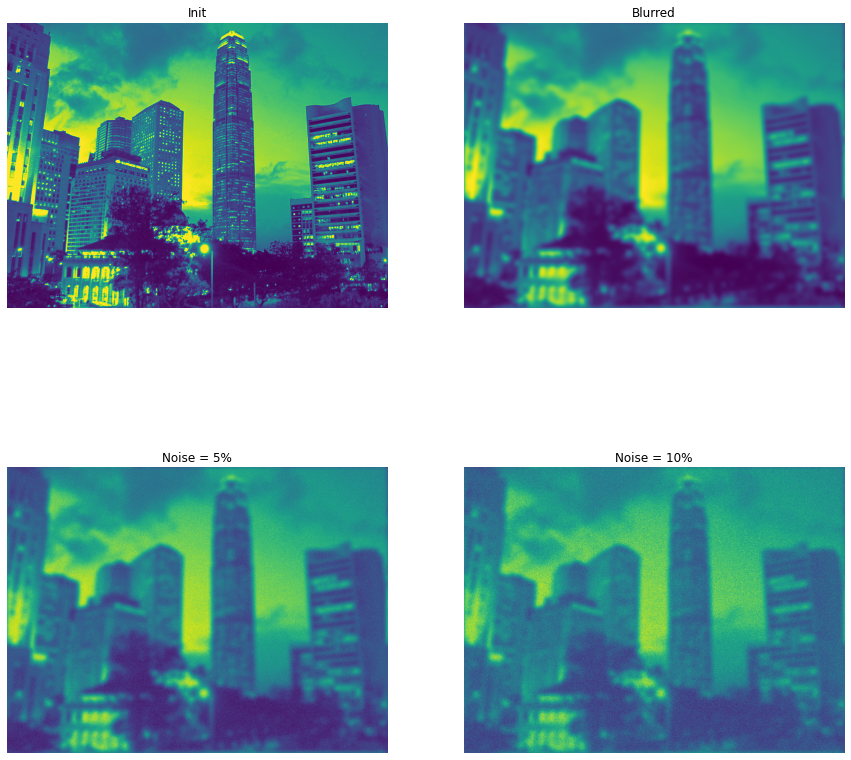

In [7]:
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2, 2 , figsize=(15,15))
ax1.imshow(x_i)
ax1.set_title('Init')
ax1.axis('off')
ax2.imshow(x_b)
ax2.set_title('Blurred')
ax2.axis('off')
ax3.imshow(x_o1)
ax3.set_title('Noise = 5%')
ax3.axis('off')
ax4.imshow(x_o2)
ax4.set_title('Noise = 10%')
ax4.axis('off')

## Solve inverse problem - No Noise

In [8]:
from estimator import Estimator
alpha = 1
mu = 1
K_alpha = Estimator(M,x_i,x_b,alpha,mu,niter = 500)

In [9]:
K_alpha.shape

(20, 20)

(-0.5, 19.5, 19.5, -0.5)

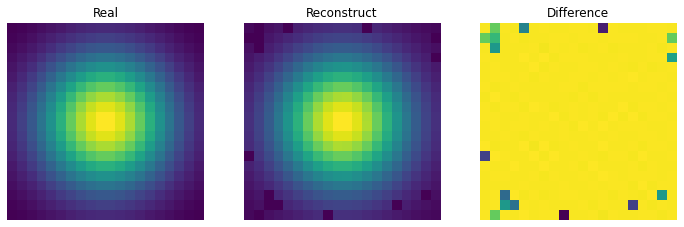

In [10]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3 ,figsize=(12,12))
ax1.imshow(K)
ax1.set_title('Real')
ax1.axis('off')
ax2.imshow(K_alpha)
ax2.set_title('Reconstruct')
ax2.axis('off')
ax3.imshow(K_alpha-K)
ax3.set_title('Difference')
ax3.axis('off')

## Solve inverse problem - With noise

In [11]:
alpha = 2
mu = 1
K_a1 = Estimator(M,x_i,x_o1,alpha,mu,niter = 500)

In [12]:
alpha = 100
mu = 1
K_a2 = Estimator(M,x_i,x_o1,alpha,mu,niter = 500)

(-0.5, 19.5, 19.5, -0.5)

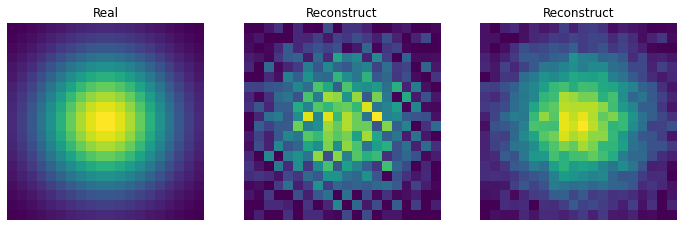

In [13]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3 ,figsize=(12,12))
ax1.imshow(K)
ax1.set_title('Real')
ax1.axis('off')
ax2.imshow(K_a1)
ax2.set_title('Reconstruct')
ax2.axis('off')
ax3.imshow(K_a2)
ax3.set_title('Reconstruct')
ax3.axis('off')